In [1]:
!pwd

/teamspace/studios/this_studio/mlprojectcars/notebooks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
!matplotlib inline

zsh:1: command not found: matplotlib


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [4]:
#Data ingestion
DATASET_LOC = '../data/'
file0 = 'data.csv'

df0 = pd.read_csv(os.path.join(DATASET_LOC,file0))
#df1 = pd.read_csv(os.path.join(DATASET_LOC,file1))
df = pd.concat([df0])
#df = pd.concat([df0,df1])
df.head()

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
0,Ford_Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford_Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford_Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford_Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford_Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [8]:
df.columns

Index(['brand_model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax', 'milesPerGallon', 'engineSize'],
      dtype='object')

In [13]:
df.shape

(33122, 9)

In [5]:
#Transforming variables into the formats we need them
df.dtypes

brand_model        object
year                int64
price               int64
transmission       object
mileage             int64
fuelType           object
tax                 int64
milesPerGallon    float64
engineSize        float64
dtype: object

In [11]:
#Transforming variables into the formats we need them
df.loc[:,'price'] = df['price'].astype('float64')

In [14]:
df.head()

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
0,Ford_Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford_Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford_Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford_Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford_Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [15]:
#Si no hay un set de test es buena práctica guardar una porción de los datos para esto

# Obtener conjuntos de entrenamiento y validación
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Mostrar los tamaños de los conjuntos de salida
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

# Almacenar los conjuntos de datos en un nuevo df
train_df.to_csv(os.path.join(DATASET_LOC,'train_file.csv'), index=False)
test_df.to_csv(os.path.join(DATASET_LOC,'test_file.csv'), index=False)

Training set shape: (26497, 9)
Testing set shape: (6625, 9)


In [ ]:
#Analicemos los datos de entrenamiento

In [16]:
# Revisar datos nulos
train_df.isna().sum()

brand_model       0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax               0
milesPerGallon    0
engineSize        0
dtype: int64

In [17]:
# Calcular el porcentaje de valores faltantes en cada columna
missing_percent = train_df.isnull().mean() * 100

# Filter out columns with no missing values
missing_percent = missing_percent[missing_percent > 0]

# Create a DataFrame to hold the results
missing_summary = train_df.isnull().sum().to_frame(name='Missing Count')
missing_summary['Missing Percentage'] = missing_percent.round(3)

# Filter the summary to only include columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Print the summary
print(missing_summary)

# Define the threshold for the maximum percentage of null values allowed per column
max_missing_percent = 50  # For example, 50%
# Filter out columns with missing values percentage higher than the threshold
columns_to_drop = missing_percent[missing_percent > max_missing_percent].index
train_df_filtered = df.drop(columns=columns_to_drop)

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [18]:
train_df_filtered.head()

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
0,Ford_Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford_Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford_Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford_Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford_Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [21]:
# Threshold to remove samples having missing values greater than threshold
max_nulls_allowed = 0
# Getting Missing count of each sample            
nulls_per_row = train_df_filtered.isnull().sum(axis=1)
print("Samples Before Removal : {}".format(train_df_filtered.shape[0]))
# Filter out rows with more than the allowed number of null values
train_df_filtered = train_df_filtered[nulls_per_row <= max_nulls_allowed]
print("Samples After Removal : {}".format(train_df_filtered.shape[0]))

Samples Before Removal : 33122
Samples After Removal : 33122


In [22]:
# Veamos la descripción del dataset:
train_df_filtered.describe(include='all')

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
count,33122,33122.000000,33122.000000,33122,33122.000000,33122,33122.000000,33122.000000,33122.000000
unique,50,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,Ford_Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,6557,NaN,NaN,24934,NaN,20731,NaN,NaN,NaN
mean,NaN,2017.044683,14366.095797,NaN,22782.077592,NaN,113.064428,56.006241,1.465168
std,NaN,2.060700,6698.673164,NaN,20266.265383,NaN,62.688154,12.043983,0.463069
min,NaN,1996.000000,495.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000
25%,NaN,2016.000000,9750.000000,NaN,8207.000000,NaN,30.000000,48.700000,1.000000
50%,NaN,2017.000000,12880.000000,NaN,17506.000000,NaN,145.000000,56.500000,1.500000
75%,NaN,2019.000000,17798.000000,NaN,31398.500000,NaN,145.000000,62.800000,2.000000


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'milesPerGallon'}>,
        <Axes: title={'center': 'engineSize'}>]], dtype=object)

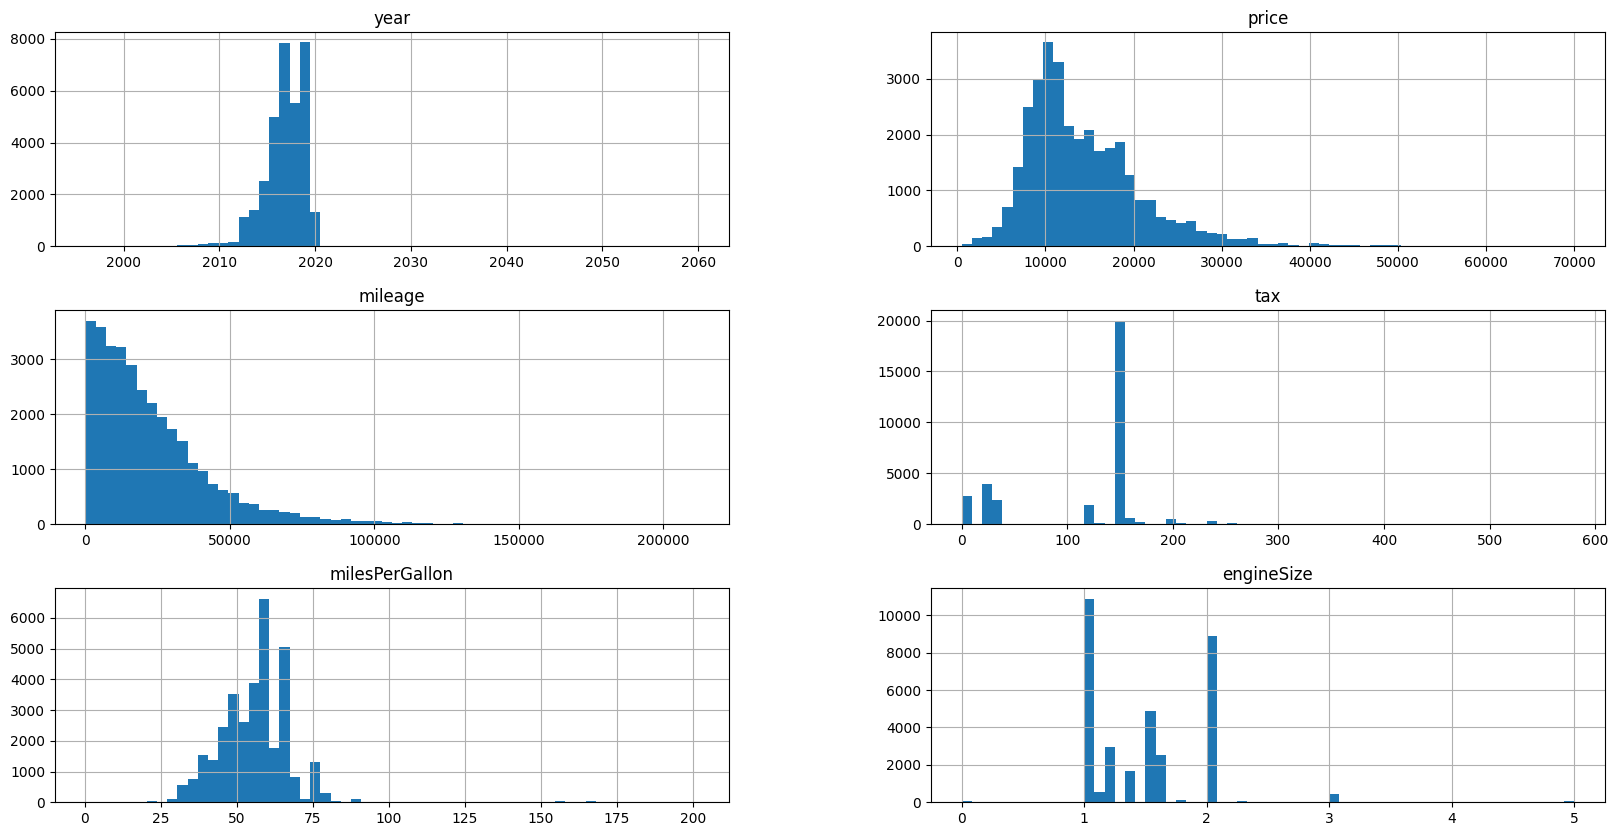

In [23]:
#Histogramas de todas las columnas
train_df_filtered.hist(figsize=(20,10), bins=60)

In [24]:
# El valor mínimo de `engineSize` no tiene sentido.
# Veamos cuántos registros son anómalos:
train_df_filtered[train_df_filtered.engineSize < 1]   

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
13862,Ford_Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Ford_Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Ford_Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,Ford_KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,Ford_EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
...,...,...,...,...,...,...,...,...,...
29613,VW_Tiguan,2016,15300,Manual,38398,Diesel,145,53.3,0.0
29620,VW_Tiguan,2018,24000,Automatic,22200,Diesel,145,47.9,0.0
30786,VW_Up,2017,8500,Manual,20324,Petrol,20,64.2,0.0
30844,VW_Up,2017,8000,Manual,24444,Petrol,20,60.1,0.0


In [25]:
# Eliminemos los registros con tamaño del motor menor a 1 litro:
train_df_filtered.drop(index=train_df_filtered[train_df_filtered.engineSize < 1].index, inplace=True)

In [26]:
# Veamos la nueva descripción de la columna `engineSize`:
train_df_filtered.engineSize.describe()

count    33056.000000
mean         1.468094
std          0.458875
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          5.000000
Name: engineSize, dtype: float64

In [27]:
# El valor máximo del año tampoco tiene sentido.
# Veamos cuántos registros son anómalos:
train_df_filtered[train_df_filtered['year'] > 2020]

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
17726,Ford_Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [28]:
# Eliminemos el registro con año mayor que 2020:
train_df_filtered.drop(index=train_df_filtered[train_df_filtered['year'] > 2020].index, inplace=True)

In [29]:
# Veamos la nueva descripción de la columna `year`:
train_df_filtered['year'].describe()

count    33055.000000
mean      2017.042777
std          2.048155
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

In [30]:
# Analicemos la distribución de los valores de la columna `transmission`:
train_df_filtered.transmission.value_counts()

transmission
Manual       24877
Semi-Auto     4867
Automatic     3311
Name: count, dtype: int64

In [31]:
# Analicemos la distribución de los valores de la columna `fuelType`:
train_df_filtered.fuelType.value_counts()

fuelType
Petrol      20677
Diesel      12122
Hybrid        166
Other          88
Electric        2
Name: count, dtype: int64

In [32]:
class MergeElectricToOther(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy[self.column_name] = X_copy[self.column_name].replace('Electric', 'Other')
        return X_copy

In [33]:
# Creemos el pipeline
pipeline = Pipeline([
    ('merge_electric_to_other', MergeElectricToOther(column_name='fuelType'))
])

# Fit and transform the data
train_df_transformed = pipeline.fit_transform(train_df_filtered)
print(train_df_transformed)

       brand_model  year  price transmission  mileage fuelType  tax  \
0      Ford_Fiesta  2017  12000    Automatic    15944   Petrol  150   
1       Ford_Focus  2018  14000       Manual     9083   Petrol  150   
2       Ford_Focus  2017  13000       Manual    12456   Petrol  150   
3      Ford_Fiesta  2019  17500       Manual    10460   Petrol  145   
4      Ford_Fiesta  2019  16500    Automatic     1482   Petrol  145   
...            ...   ...    ...          ...      ...      ...  ...   
33117       VW_Eos  2012   5990       Manual    74000   Diesel  125   
33118       VW_Fox  2008   1799       Manual    88102   Petrol  145   
33119       VW_Fox  2009   1590       Manual    70000   Petrol  200   
33120       VW_Fox  2006   1250       Manual    82704   Petrol  150   
33121       VW_Fox  2007   2295       Manual    74000   Petrol  145   

       milesPerGallon  engineSize  
0                57.7         1.0  
1                57.7         1.0  
2                57.7         1.0  
3  

In [34]:
# Analicemos la distribución de los valores de la columna `fuelType`:
train_df_transformed.fuelType.value_counts()

fuelType
Petrol    20677
Diesel    12122
Hybrid      166
Other        90
Name: count, dtype: int64

In [35]:
#Apliquemos el mismo proceso al conjunto de test
#Remover columnas que fueron eliminadas en los datos de entrenamiento
test_df = df.drop(columns=columns_to_drop)
# Threshold to remove samples having missing values greater than threshold
max_nulls_allowed = 0
# Getting Missing count of each sample            
nulls_per_row = test_df.isnull().sum(axis=1)
print("Samples Before Removal : {}".format(test_df.shape[0]))
# Filter out rows with more than the allowed number of null values
test_df = test_df[nulls_per_row <= max_nulls_allowed]
print("Samples After Removal : {}".format(test_df.shape[0]))

# Eliminemos los registros con tamaño del motor menor a 1 litro:
test_df.drop(index=test_df[test_df.engineSize < 1].index, inplace=True)

# Eliminemos el registro con año mayor que 2020:
test_df.drop(index=test_df[test_df['year'] > 2020].index, inplace=True)

# Apliquemos el pipeline para combinar las columnas
test_df_transformed = pipeline.transform(test_df)

Samples Before Removal : 33122
Samples After Removal : 33122


In [36]:
# Almacenar los conjuntos de datos en un nuevo df
train_df_transformed.to_csv(os.path.join(DATASET_LOC,'train_df_transformed.csv'), index=False)
test_df_transformed.to_csv(os.path.join(DATASET_LOC,'test_df_transformed.csv'), index=False)

In [ ]:
#Qué deberíamos almacenar?
preparation_params = {}
preparation_params["columns_to_drop"] = columns_to_drop.tolist()
preparation_params["max_null_allowed"] = max_nulls_allowed
preparation_params["min_engineSize"] = 1
preparation_params["max_year"] = 2020
preparation_params["pipeline"] = pipeline

# Specify the file name
preparation_file = os.path.join(DATASET_LOC,'preparation', 'preparation_params.pkl') #Parámetros

# Save the model to a file
with open(preparation_file, 'wb') as file:
    pickle.dump(preparation_params, file)